In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('부산광역시_노인요양시설현황_20220228.csv',encoding='cp949')
us= pd.read_csv('울산광역시_노인요양시설 현황_20211111.csv',encoding='cp949')

In [5]:
us=us.rename(columns={'소재지':'구군'})

In [6]:
us=us.drop(columns=['정 원','전화번호','홈페이지','홈페이지','연번','설립연도 '])

In [8]:
us.columns

Index(['시설명', '위도', '경도', '구군'], dtype='object')

In [9]:
us['구군']=us['구군'].str.split().str.get(0)

In [10]:
# 학성로 중구 ,성안1길169 중구 ,무룡로 북구 ,온산읍 울주군

In [11]:
us=us.replace({'학성로':'중구','성안1길169':'중구','무룡로':'북구','온산읍':'울주군'})

In [12]:
us.groupby

<bound method DataFrame.groupby of                 시설명         위도          경도   구군
0             울산양로원  35.650767  129.198548  울주군
1             성애양로원  35.712626  129.205802  울주군
2             국민요양원  35.579875  129.326101   중구
3       울산광역시립노인요양원  35.576036  129.320586   중구
4        늘푸른노인전문요양원  35.577478  129.320783   중구
5          늘푸른노인요양원  35.577478  129.320783   중구
6          예랑소규모요양원  35.578251  129.348788   중구
7         백정애노인실버타운  35.580402  129.323733   중구
8          A+헤븐실버케어  35.106108  129.030706   중구
9          푸른세상효요양원  35.555917  129.323582   중구
10          효자실버요양원  35.580034  129.325922   중구
11        신정소규모요양시설  35.538558  129.305152   남구
12          가온노인요양원  35.514089  129.336304   남구
13          행복사랑요양원  35.541152  129.326877   남구
14            울산요양원  35.530501  129.308977   남구
15          느티나무요양원  35.546254  129.309389   남구
16            오복요양원  35.531348  129.306949   남구
17          동구노인요양원  35.532414  129.414423   동구
18         다비다노인요양원  35.490004  129.417251   동구
19   

In [13]:
us1=us.groupby(['구군'])['시설명'].count().sort_values(ascending=False).to_frame()

In [14]:
us1.reset_index(inplace=True)

In [50]:
us1=us1.rename(columns={'시설명':'장기요양기관'})

In [51]:
us1

,구군,장기요양기관
0,울주군,26
1,남구,9
2,중구,9
3,북구,5
4,동구,3


In [42]:
df.drop(columns=['연번','전화번호'])

,구군,급여종류,장기요양기관,설립연도,연면적(제곱미터),주소,위도,경도
0,중구,노인요양시설,송산노인전문요양원,2008,2862.00,중앙동4가,35.108210,129.038410
1,중구,노인요양시설,굿모닝노인요양원,2021,2318.96,영주동,35.112594,129.036441
2,서구,노인요양시설,안나노인건강센터,2005,3076.00,서대신동3가,35.127712,129.004667
3,서구,노인요양시설,인창서구그린빌노인요양원,2012,1329.00,동대신동3가,35.115147,129.016536
4,서구,노인요양시설,실버웰요양센터,2013,1086.00,서대신동3가,35.112564,129.008485
...,...,...,...,...,...,...,...,...
110,기장군,노인요양시설,주사랑재활요양원,2018,919.00,기장읍,35.219097,129.226297
111,기장군,노인요양시설,하서 요양원,2018,799.00,정관읍,35.320823,129.181225
112,기장군,노인요양공동생활가정,해피케어 노인요양공동생활가정,2018,194.00,철마면,35.307500,129.112010
113,기장군,노인요양시설,효산요양원,2019,1460.00,철마면,35.313805,129.114505


In [43]:
df['주소']=df['주소'].str.split().str.get(-1).str.replace('(','').str.replace(')','')

C:\Users\admin\AppData\Local\Temp\ipykernel_23584\282438993.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['주소']=df['주소'].str.split().str.get(-1).str.replace('(','').str.replace(')','')


In [44]:
import json
import folium

In [45]:
path='HangJeongDong_ver20220401.geojson'

In [46]:
map = folium.Map((35.1795543,129.0756416),zoom_start=9)
rfile = open(path,'r',encoding='utf8').read()
jsonfile = json.loads(rfile)


json_bs = {'type':'FeatureCollection'}
json_pick = []
json_gu = []
for item in jsonfile['features']:
    # print(item)
    if item['properties']['sidonm']=='부산광역시':
        # print(item)
        gu = item['properties']['adm_nm'].split()[1]
        # print(dong)
        item['id'] = gu
        # print(item)
        json_gu.append(gu)
        json_pick.append(item)
        print(item)
        
json_bs['features'] = json_pick

# map

{'type': 'Feature', 'properties': {'OBJECTID': 425, 'adm_nm': '부산광역시 중구 중앙동', 'adm_cd': '2101051', 'adm_cd2': '2611051000', 'sgg': '26110', 'sido': '26', 'sidonm': '부산광역시', 'temp': '중구 중앙동', 'sggnm': '중구', 'adm_cd8': '21010510'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[129.04001607594367, 35.111424681629], [129.0427298111509, 35.110722158835344], [129.042347191582, 35.11034344765853], [129.0423152220015, 35.11029796763163], [129.041990699126, 35.10982871044188], [129.0414304709214, 35.109010295030885], [129.04088010913745, 35.10811134155702], [129.0445525636584, 35.10580584261088], [129.04373774886275, 35.10492439441351], [129.04036624750276, 35.10703056658817], [129.0398182034819, 35.10584181288945], [129.0399339281879, 35.10576888949396], [129.04367586047277, 35.103410637547064], [129.04224004979767, 35.10191413106284], [129.0399974305661, 35.10287262132304], [129.03886909859048, 35.10355492774449], [129.03967360893532, 35.104392862686176], [129.03822575608223, 35.104

In [47]:

rfile = open(path,'r',encoding='utf8').read()
jsonfile = json.loads(rfile)


json_us = {'type':'FeatureCollection'}
json_pick = []
json_gu= []
for item in jsonfile['features']:
    
    if item['properties']['sidonm']=='울산광역시':
    
        gu = item['properties']['adm_nm'].split()[1]
     
        item['id'] = gu
       
        json_gu.append(gu)
        json_pick.append(item)
      
json_us['features'] = json_pick

# map

In [48]:
map = folium.Map((35.1607577, 129.0472984),zoom_start=8)
folium.Choropleth(json_bs,
                 data=df1,
                 columns=['구군','장기요양기관'],
                 key_on='feature.id',
                 fill_opacity=0.5).add_to(map)
# map

In [55]:
# map = folium.Map((35.1795543,129.0756416),zoom_start=9)
# rfile = open(path,'r',encoding='utf8').read()
# jsondata = json.loads(rfile)
folium.Choropleth(json_us,
                 data=us1,
                 columns=['구군','장기요양기관'],
                 key_on='feature.id',bins=8,
                 fill_opacity=1,
                 nan_fill_color='pink',
                 fill_color='YlGnBu').add_to(map)
map

In [24]:
df1 = df.groupby(['구군'])['장기요양기관'].count().sort_values(ascending=False).to_frame()
df1.reset_index(inplace=True)

In [25]:
df1

,구군,장기요양기관
0,기장군,19
1,사하구,11
2,해운대구,11
3,북구,10
4,금정구,8
5,부산진구,8
6,사상구,8
7,연제구,8
8,동래구,7
9,수영구,5


In [26]:
map = folium.Map((35.1795543,129.0756416),zoom_start=9)
rfile = open(path,'r',encoding='utf8').read()
jsondata = json.loads(rfile)
folium.Choropleth(json_bs,
                 data=df1,
                 columns=['구군','장기요양기관'],
                 key_on='feature.id',bins=5,
                 fill_opacity=0.6,
                 nan_fill_color='pink',
                 fill_color='YlGnBu').add_to(map)
map

In [ ]:
df2=df.groupby(['구군','장기요양기관','위도','경도']).count()

In [ ]:
df2.reset_index(inplace=True)
# df2.drop(columns=['연번','급여종류','설립연도','연면적(제곱미터)','전화번호','주소'])

In [ ]:
df2.columns

In [ ]:
df2=df2.drop(columns=['연번','급여종류','설립연도                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ','연면적(제곱미터) ','전화번호','주소'])

In [ ]:
df2

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.family']='NanumBarunGothic'
plt.rcParams['font.size']=13

<AxesSubplot:xlabel='구군', ylabel='장기요양기관'>

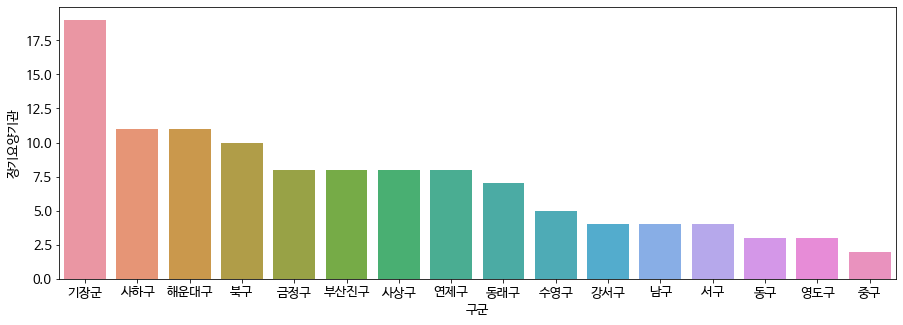

In [54]:
plt.figure(figsize=(15,5))
sns.barplot(data=df1,x='구군',y='장기요양기관')

<AxesSubplot:xlabel='구군', ylabel='장기요양기관'>

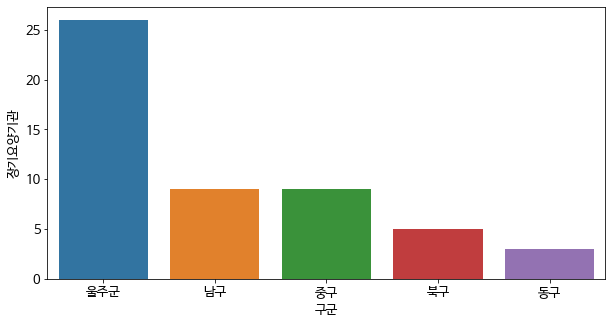

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(data=us1,x='구군',y='장기요양기관')